- Introduction to tensors
- Getting information from tensors
- Manipulating tensors
- Tensors & NumPy
- Using @tf.function (a way to speed up your regular Python functions)
- Using GPUs with TensorFlow (or TPUs)
- Exercises to try for yourself!

### Introduction to Tensors

In [4]:
# Import TensorFlow 

import tensorflow as tf 
print(tf.__version__)

2.18.0


#### Create Tensors

##### Creating Tensors With tf.constant()

In [ ]:
# tf.constant(
#     value, dtype=None, shape=None, name='Const'
# )

# By default we get dtype as int32 

In [6]:
scalar = tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [7]:
# Check the dimension
scalar.ndim

0

In [9]:
# Create Vector 
vector = tf.constant([1 , 2 ,3  , 5])
vector

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 5], dtype=int32)>

In [10]:
# Check the dimension
vector.ndim

1

In [11]:
# Create Matrix 
mat = tf.constant([[2,3],
                   [4,5]])
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2, 3],
       [4, 5]], dtype=int32)>

In [12]:
mat.ndim

2

In [14]:
mat2 = tf.constant([[10. , 7.],
                   [6. , 9. ],
                   [18. , 6.3 ]] , dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10. ,  7. ],
       [ 6. ,  9. ],
       [18. ,  6.3]], dtype=float16)>

In [15]:
mat2.ndim

2

In [16]:
# Create Tensor 

tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

- Scalar : A single number
- Vector : A number with direction (Eg: Wind speed and direction)
- Matrix : A two dimensional array of vectors.
- Tensor : An n-dimensional array of numbers . (When n is any number we call tensor , if it is 2 we call is matrix if it is 1 we call it vector , if it is 0 we call is scalar )

##### Creating Tensors With tf.vector()

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using tf.Variable().

The difference between tf.Variable() and tf.constant() is tensors created with tf.constant() are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with tf.Variable() are mutable (can be changed).

In [18]:
# tf.Variable(
#     initial_value=None,
#     trainable=None,
#     validate_shape=True,
#     caching_device=None,
#     name=None,
#     variable_def=None,
#     dtype=None,
#     import_scope=None,
#     constraint=None,
#     synchronization=tf.VariableSynchronization.AUTO,
#     aggregation=tf.compat.v1.VariableAggregation.NONE,
#     shape=None,
#     experimental_enable_variable_lifting=True
# )

In [19]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor 

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [20]:
# Now let's try to change one of the elements of the changable tensor. 


# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [21]:
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [22]:
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [23]:
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

#### Creating Random Tensors 

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors?

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

In [24]:
# tf.random.uniform(
#     shape,
#     minval=0,
#     maxval=None,
#     dtype=tf.dtypes.float32,
#     seed=None,
#     name=None
# )

In [29]:
import tensorflow as tf

# The tf.random.Generator class provides a stateful and reproducible random number generator.
# It ensures consistent random number generation when a seed is set, which is crucial for debugging
# and reproducibility in experiments.

# Initialize the generator with a seed for reproducibility
rand = tf.random.Generator.from_seed(42)

# Generate random numbers from a normal (Gaussian) distribution
# Default mean = 0, stddev = 1
normal_sample = rand.normal(shape=(2,3))  # Generates 5 samples from a normal distribution

# Generate random numbers from a uniform distribution
# Values are generated in the range [0, 1)
uniform_sample = rand.uniform(shape=(5,))  # Generates 5 samples from a uniform distribution

# Generate random numbers from a Poisson distribution
# NOTE: The Poisson distribution is not directly supported by the Generator class.
# Instead, we use the standalone tf.random.poisson() function.
poisson_sample = tf.random.poisson(shape=[3,2], lam=3.0, seed=42)  # Lambda (mean rate) = 3.0

# Generate random numbers from a truncated normal distribution
# Similar to a normal distribution, but values more than 2 standard deviations from the mean
# are discarded and redrawn.
truncated_normal_sample = rand.truncated_normal(shape=(5,2))  # Generates 5 samples

# Generate random numbers from a Gamma distribution
# NOTE: The Gamma distribution is also not directly supported by the Generator class.
# Instead, we use the standalone tf.random.gamma() function.
gamma_sample = tf.random.gamma(shape=[2,1], alpha=2.0, seed=42)  # Shape parameter alpha = 2.0

# Print the generated samples
print("Normal Sample:", normal_sample.numpy())               # Normal distribution samples
print("Uniform Sample:", uniform_sample.numpy())             # Uniform distribution samples
print("Poisson Sample:", poisson_sample.numpy())             # Poisson distribution samples
print("Truncated Normal Sample:", truncated_normal_sample.numpy())  # Truncated normal samples
print("Gamma Sample:", gamma_sample.numpy())                 # Gamma distribution samples

Normal Sample: [[-0.7565803  -0.06854702  0.07595026]
 [-1.2573844  -0.23193763 -1.8107855 ]]
Uniform Sample: [0.7647915  0.03845465 0.8506975  0.20781887 0.711869  ]
Poisson Sample: [[3. 1.]
 [1. 5.]
 [0. 2.]]
Truncated Normal Sample: [[ 1.2180811  -0.24145207]
 [ 1.1183965   0.6255858 ]
 [ 1.2866228  -0.714756  ]
 [-0.1019548   0.3831789 ]
 [ 0.32647735  0.17025015]]
Gamma Sample: [[1.5295417]
 [1.4664378]]


#### Shuffling the order of the elements in the tensors

Wait, why would you want to do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [69]:
tensor1 = tf.constant([[2,3,5],[1,2,8],[8,9,0]])
print(tensor1.numpy())

# shuffle our non-shuffled tensor using Global Seed To Keep Things Constant.
tf.random.set_seed(42) # This sets the Global seed 
shuffled_tensor1 = tf.random.shuffle(tensor1)
print(shuffled_tensor1.numpy())

# shuffle our non-shuffled tensor using Operation-Level Seed To Keep Things Constant.
shuffled_tensor2 = tf.random.shuffle(tensor1, seed=92) 
print(shuffled_tensor2.numpy())

[[2 3 5]
 [1 2 8]
 [8 9 0]]
[[1 2 8]
 [8 9 0]
 [2 3 5]]
[[2 3 5]
 [8 9 0]
 [1 2 8]]



- If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

tf.random.set_seed(42) sets the global seed, and the seed parameter in tf.random.shuffle(seed=42) sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."

#### Other Ways to make Tensors 

##### Using Numpy

Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use
- tf.ones() => to create a tensor of all ones and
- tf.zeros() =>  to create a tensor of all zeros.

In [71]:
a = tf.ones(shape=[3,4])
print(a)

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


In [75]:
b = tf.zeros(shape=(3,4))
print(b)

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(3, 4), dtype=float32)


- Remember, the main difference between tensors and NumPy arrays is that tensors can be run on GPUs.

In [87]:
# Converting Numpy arrays into Tensors 

import numpy as np 
a = np.arange(1 , 16 , dtype=np.int32)
print("Numpy array : ",a)

A = tf.constant(a , shape=(3,5))
print("Tensor : ",A)

Numpy array :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Tensor :  tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]], shape=(3, 5), dtype=int32)


##### "reshape()" function can be used to change the possible shape of a matrix.

In [168]:
tf.reshape(A,shape=[5,3])

<tf.Tensor: shape=(5, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]], dtype=int32)>

### Getting information from tensors (shape, rank, size)

There will be times when you'll want to get different pieces of information from your tensors, in particuluar, you should know the following tensor vocabulary:

- Shape: The length (number of elements) of each of the dimensions of a tensor.
- Rank: The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
- Axis or Dimension: A particular dimension of a tensor.
- Size: The total number of items in the tensor.
You'll use these especially when you're trying to line up the shapes of your data to the shapes of your model. For example, making sure the shape of your image tensors are the same shape as your models input layer.

We've already seen one of these before using the ndim attribute. Let's see the rest.

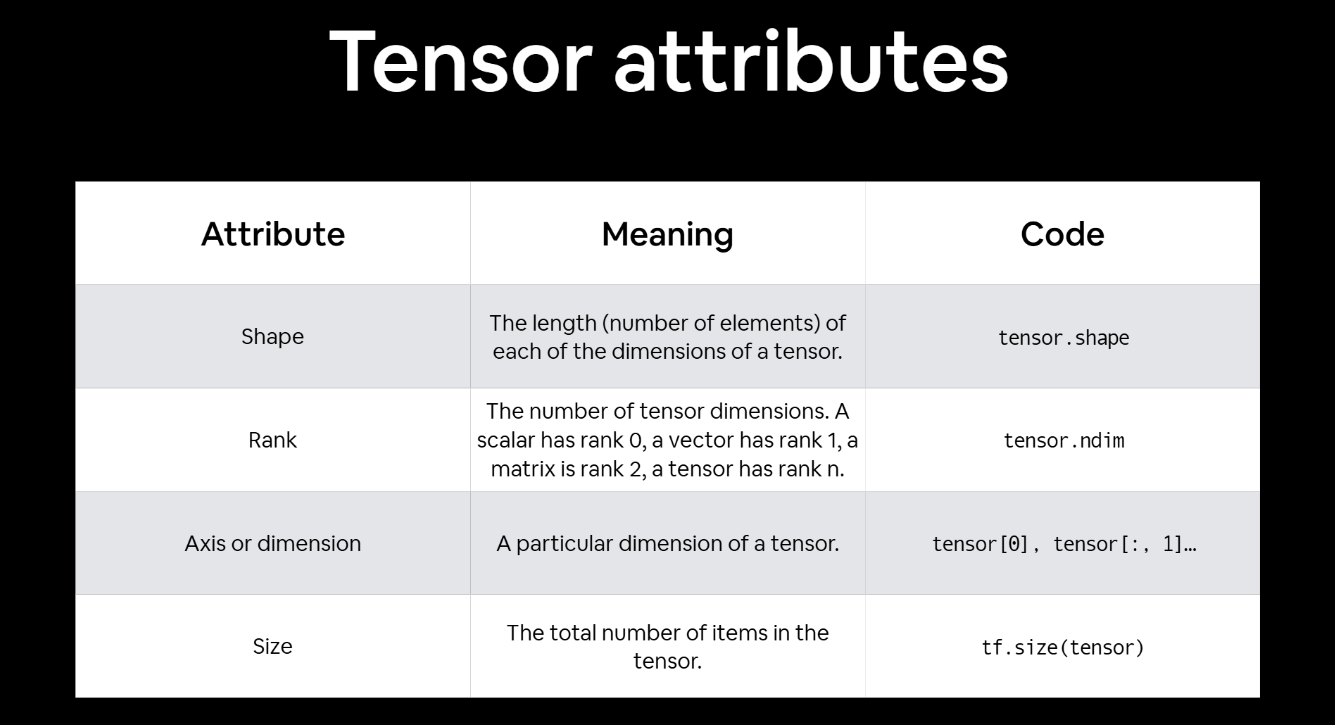

In [89]:
# Rank - 4 tensor  

tensor_rank_4 = tf.zeros(shape=[2 , 3 , 4 , 5])
print(tensor_rank_4.numpy())

[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]]


In [92]:
tensor_rank_4.shape

TensorShape([2, 3, 4, 5])

In [104]:
tensor_rank_4.shape[0]

2

In [93]:
tensor_rank_4.ndim

4

In [97]:
tf.size(tensor_rank_4)

<tf.Tensor: shape=(), dtype=int32, numpy=120>

In [101]:
tensor_rank_4.dtype

tf.float32

In [98]:
tensor_rank_4[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [99]:
tensor_rank_4[0][1]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [100]:
tensor_rank_4[0][1][0]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [102]:
tensor_rank_4[-1]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

#### Indexing Tensors

- Tensors can be indexed just like python lists

In [107]:
rand = tf.random.Generator.from_seed(42)
tensor = rand.normal(shape=[2, 3 , 4])
print(tensor)

tf.Tensor(
[[[-0.7565803  -0.06854702  0.07595026 -1.2573844 ]
  [-0.23193763 -1.8107855   0.09988727 -0.50998646]
  [-0.7535805  -0.57166284  0.1480774  -0.23362993]]

 [[-0.3522796   0.40621263 -1.0523509   1.2054597 ]
  [ 1.6874489  -0.4462975  -2.3410842   0.99009085]
  [-0.0876323  -0.635568   -0.6161736  -1.9441465 ]]], shape=(2, 3, 4), dtype=float32)


In [121]:
tensor[0][0][:2].numpy()

array([-0.7565803 , -0.06854702], dtype=float32)

In [119]:
tensor[0][:2 , :2].numpy()

array([[-0.7565803 , -0.06854702],
       [-0.23193763, -1.8107855 ]], dtype=float32)

In [124]:
tensor[0][:2 ,:3].numpy()

array([[-0.7565803 , -0.06854702,  0.07595026],
       [-0.23193763, -1.8107855 ,  0.09988727]], dtype=float32)

#### Expanding Dimensions

In [138]:
image = rand.normal([2,2,3])

In [139]:
tf.expand_dims(image, axis=0).shape

TensorShape([1, 2, 2, 3])

In [140]:
tf.expand_dims(image, axis=-1).shape

TensorShape([2, 2, 3, 1])

In [141]:
print(image)
print("")
print(tf.expand_dims(image, axis=0))
print("")
print(tf.expand_dims(image, axis=-1))
print("")

tf.Tensor(
[[[ 1.9275005   1.0200135   0.03280555]
  [-0.47456512 -1.1306678   0.5108442 ]]

 [[ 0.9039908  -1.6280141  -0.34076104]
  [ 0.5203792  -1.7207808  -0.14326058]]], shape=(2, 2, 3), dtype=float32)

tf.Tensor(
[[[[ 1.9275005   1.0200135   0.03280555]
   [-0.47456512 -1.1306678   0.5108442 ]]

  [[ 0.9039908  -1.6280141  -0.34076104]
   [ 0.5203792  -1.7207808  -0.14326058]]]], shape=(1, 2, 2, 3), dtype=float32)

tf.Tensor(
[[[[ 1.9275005 ]
   [ 1.0200135 ]
   [ 0.03280555]]

  [[-0.47456512]
   [-1.1306678 ]
   [ 0.5108442 ]]]


 [[[ 0.9039908 ]
   [-1.6280141 ]
   [-0.34076104]]

  [[ 0.5203792 ]
   [-1.7207808 ]
   [-0.14326058]]]], shape=(2, 2, 3, 1), dtype=float32)



### Manipulating Tensors (tensor operations)

#### Basic Operations : + , - , * , /

In [144]:
tens1 = tf.constant([[10,7],[3,4]])
print(tens1 + 10)

tf.Tensor(
[[20 17]
 [13 14]], shape=(2, 2), dtype=int32)


In [145]:
print(tens1 - 1)

tf.Tensor(
[[9 6]
 [2 3]], shape=(2, 2), dtype=int32)


In [147]:
print(tens1*2)

tf.Tensor(
[[20 14]
 [ 6  8]], shape=(2, 2), dtype=int32)


In [148]:
print(tens1/2)

tf.Tensor(
[[5.  3.5]
 [1.5 2. ]], shape=(2, 2), dtype=float64)


In [150]:
tens2 = tf.constant([[5,7],[1,2]])
print(tens1/tens2)

tf.Tensor(
[[2. 1.]
 [3. 2.]], shape=(2, 2), dtype=float64)


You can also use the equivalent TensorFlow function. Using the TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a TensorFlow graph.

In [159]:
# We can add/multiply/divide/subtract like this also 
tf.multiply(tens1 , 2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 14],
       [ 6,  8]], dtype=int32)>

In [155]:
tf.multiply(tens1 , tens2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[50, 49],
       [ 3,  8]], dtype=int32)>

In [156]:
tf.add(tens1 , tens2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[15, 14],
       [ 4,  6]], dtype=int32)>

In [157]:
tf.subtract(tens1,tens2)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [2, 2]], dtype=int32)>

In [158]:
tf.divide(tens1,2)

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[5. , 3.5],
       [1.5, 2. ]])>

#### Matrix Multiplication

One of the most common operations in machine learning algorithms is matrix multiplication.

TensorFlow implements this matrix multiplication functionality in the tf.matmul() method.

The main two rules for matrix multiplication to remember are:

The inner dimensions must match:
- (3, 5) @ (3, 5) won't work
- (5, 3) @ (3, 5) will work
- (3, 5) @ (5, 3) will work

The resulting matrix has the shape of the outer dimensions:
- (5, 3) @ (3, 5) -> (5, 5)
- (3, 5) @ (5, 3) -> (3, 3)

🔑 Note: '@' in Python is the symbol for matrix multiplication.

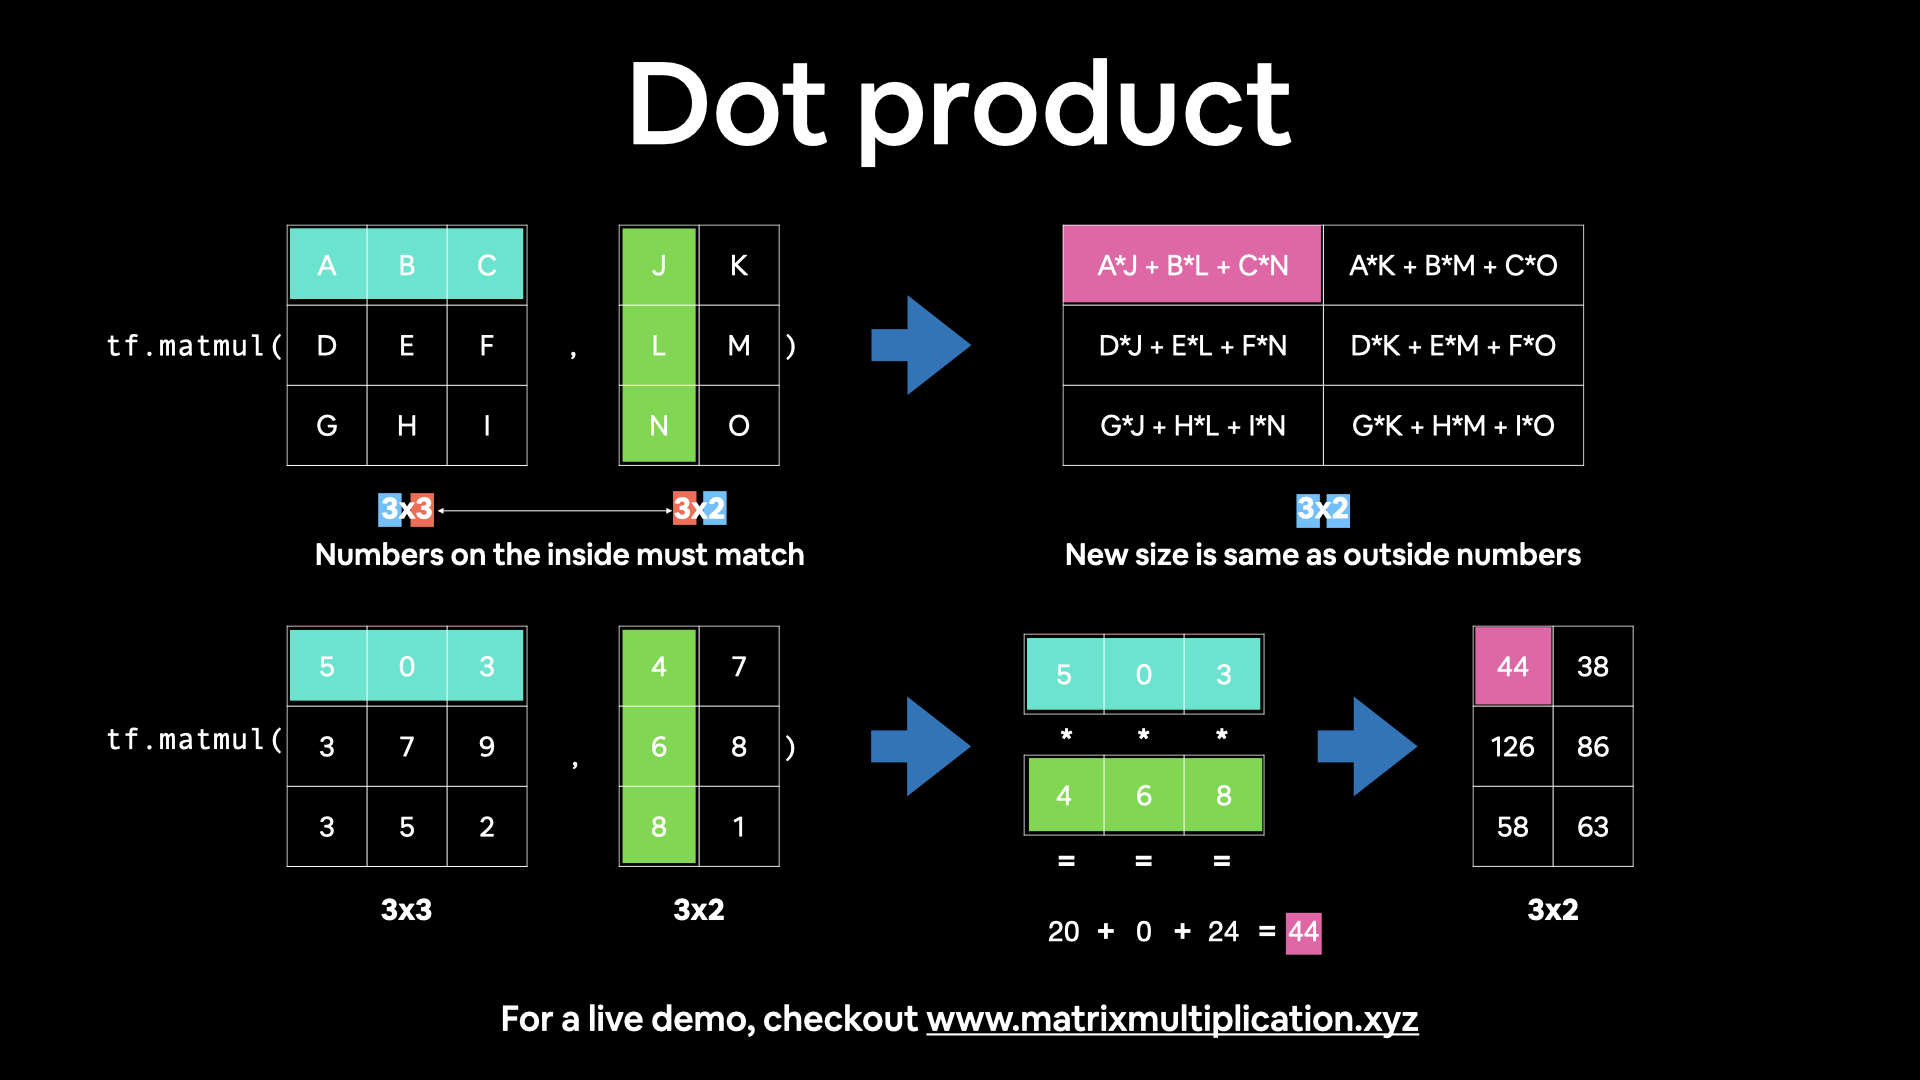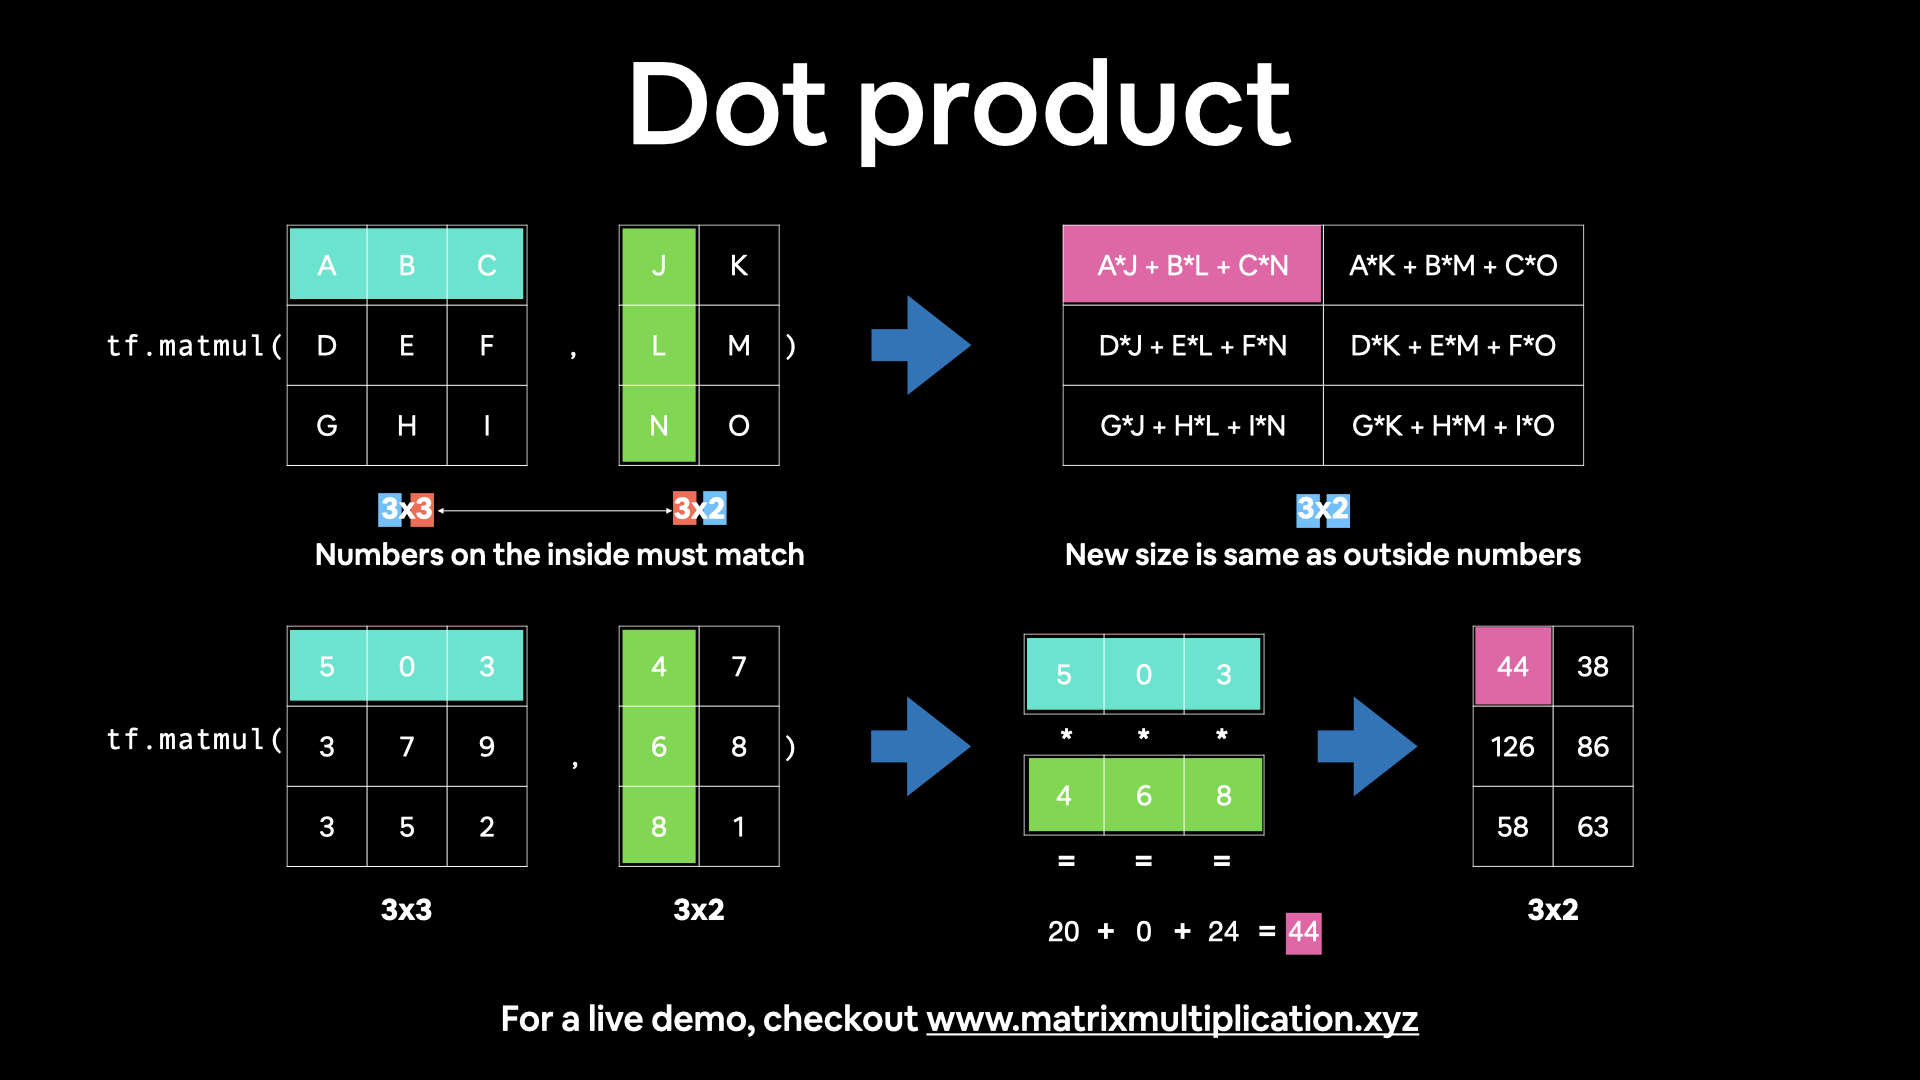

In [160]:
# tf.linalg.matmul(
#     a,
#     b,
#     transpose_a=False,
#     transpose_b=False,
#     adjoint_a=False,
#     adjoint_b=False,
#     a_is_sparse=False,
#     b_is_sparse=False,
#     output_type=None,
#     grad_a=False,
#     grad_b=False,
#     name=None
# )

In [165]:
a = rand.normal(shape=[3,4])
b = rand.normal(shape=[4,2])

print("a : ",a)
print("")
print("b : ",b)
print("")
mul = tf.matmul(a , b)
print(mul)


a :  tf.Tensor(
[[ 0.5090227   1.0585686  -0.9773618  -0.9664524 ]
 [ 1.4262112   0.06370383 -0.18283537  0.8411551 ]
 [-0.5886139   0.14992267  0.23376143 -0.10160724]], shape=(3, 4), dtype=float32)

b :  tf.Tensor(
[[-0.13689993  0.12492083]
 [ 0.3636424   0.12880103]
 [ 0.02385949  0.15838575]
 [ 0.71838737  0.7055564 ]], shape=(4, 2), dtype=float32)

tf.Tensor(
[[-0.40235132 -0.6367546 ]
 [ 0.42783004  0.75089246]
 [ 0.06768352 -0.0888851 ]], shape=(3, 2), dtype=float32)


##### Matrix Multiplication with python Operator "@"

In [164]:
a@b

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.28374887, -1.4325885 ],
       [-1.1753405 , -0.4445693 ],
       [-0.39379868, -2.450289  ]], dtype=float32)>

##### Transpose : tf.transpose()

In [169]:
a = rand.normal(shape=[3,4])
b = rand.normal(shape=[2,4])

In [171]:
# a@b => Will throw an error as they can not be matrix multiplied . 
a@b

InvalidArgumentError: {{function_node __wrapped____MklMatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,4], In[1]: [2,4] [Op:MatMul] name: 

In [172]:
# But we can take the transpose of b and then we can matrix multiply them .
a@(tf.transpose(b))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.5687988,  7.430559 ],
       [ 0.3797054,  3.0871675],
       [-2.0570273,  1.7096286]], dtype=float32)>

##### The dot product
Multiplying matrices by eachother is also referred to as the dot product.

You can perform the "tf.matmul()" operation using "tf.tensordot()""

In [174]:
tf.tensordot(a , tf.transpose(b) , axes=1)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.5687988,  7.430559 ],
       [ 0.3797054,  3.0871675],
       [-2.0570273,  1.7096286]], dtype=float32)>

As you can see, the outputs of tf.reshape() and tf.transpose() when called on Y, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:

- tf.reshape() - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
- tf.transpose() - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the perm parameter.
- 
So which should you use?

Again, most of the time these operations (when they need to be run, such as during the training a neural network, will be implemented for you).

But generally, whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will transpose (not reshape) one of them in order to line them up.

#### Changing the Datatype : tf.cast()

In [177]:
a = tf.constant([1.7 , 7.4])
a.dtype

tf.float32

In [181]:
# If we want to change the datatype from float32 to float16 : tf.cast() is used
a = tf.cast(a , dtype=tf.float16)
a.dtype

tf.float16

#### Aggregating tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values.

##### Getting the absolute value

Sometimes you'll want the absolute values (all values are positive) of elements in your tensors.

To do so, you can use tf.abs().

In [182]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [183]:
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

##### Finding the min, max, mean, sum (aggregation)

You can quickly aggregate (perform a calculation on a whole tensor) tensors to find things like the minimum value, maximum value, mean and sum of all the elements.

To do so, aggregation methods typically have the syntax reduce()_[action], such as:

- tf.reduce_min() - find the minimum value in a tensor.
- tf.reduce_max() - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
- tf.reduce_mean() - find the mean of all elements in a tensor.
- tf.reduce_sum() - find the sum of all elements in a tensor.

Note: typically, each of these is under the math module, e.g. tf.math.reduce_min() but you can use the alias tf.reduce_min().

In [184]:
a = tf.constant(np.random.randint(0,100,size=50))
a

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([32, 97, 58, 38, 96, 48, 63, 58, 23, 38, 62,  5, 94, 59, 50, 40, 56,
       67, 25, 19, 97, 96,  9, 84, 91, 91, 41, 26, 69, 65, 18, 15, 99, 42,
       71, 34, 36, 79, 31, 91, 25, 31, 59, 34, 91, 53, 36, 57, 51,  2],
      dtype=int32)>

In [192]:
tf.reduce_min(a)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [186]:
tf.reduce_max(a)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [187]:
tf.reduce_mean(a)

<tf.Tensor: shape=(), dtype=int32, numpy=53>

In [188]:
tf.reduce_sum(a)

<tf.Tensor: shape=(), dtype=int32, numpy=2652>

##### Variance()

In [205]:
tf.math.reduce_variance(tf.cast(a , dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=750.4383544921875>

##### Std Deviation()

In [204]:
tf.math.reduce_std(tf.cast(a , dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=27.39413070678711>

#### Find The Positional Maximum and Minimum

How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say ['Green', 'Blue', 'Red']) with your prediction probabilities tensor (e.g. [0.98, 0.01, 0.01]).

In this case, the predicted label (the one with the highest prediction probability) would be 'Green'.

You can do the same for the minimum (if required) with the following:

- tf.argmax() - find the position of the maximum element in a given tensor.
- tf.argmin() - find the position of the minimum element in a given tensor.

In [206]:
tf.random.set_seed(42)
f = tf.random.uniform(shape=[50])
f

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [207]:
# Find the maximum element position of f
tf.argmax(f)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [208]:
f[42]

<tf.Tensor: shape=(), dtype=float32, numpy=0.967138409614563>

In [209]:
tf.argmin(f)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [210]:
f[16]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463667869567871>

#### Squeezing a tensor (removing all single dimensions)

If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use tf.squeeze().

- tf.squeeze() - remove all dimensions of 1 from a tensor.

In [211]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [212]:

# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

#### One Hot encoding

In [213]:
list1 = [0,0,1,2,3,1,2,3,2,1,2]

tf.one_hot(list1,depth=4)

<tf.Tensor: shape=(11, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)>

In [214]:
tf.one_hot(list1,depth=4 , on_value=10 , off_value=5)

<tf.Tensor: shape=(11, 4), dtype=int32, numpy=
array([[10,  5,  5,  5],
       [10,  5,  5,  5],
       [ 5, 10,  5,  5],
       [ 5,  5, 10,  5],
       [ 5,  5,  5, 10],
       [ 5, 10,  5,  5],
       [ 5,  5, 10,  5],
       [ 5,  5,  5, 10],
       [ 5,  5, 10,  5],
       [ 5, 10,  5,  5],
       [ 5,  5, 10,  5]], dtype=int32)>

#### Squaring, log, square root
Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:

- tf.square() - get the square of every value in a tensor.
- tf.sqrt() - get the squareroot of every value in a tensor (note: the elements need to be floats or this will error).
- tf.math.log() - get the natural log of every value in a tensor (elements need to floats).

In [216]:
a = tf.range(1,20)
print(a)

tf.Tensor([ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], shape=(19,), dtype=int32)


In [217]:
# Square
tf.square(a)

<tf.Tensor: shape=(19,), dtype=int32, numpy=
array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361], dtype=int32)>

In [220]:
# Find the squareroot , needs to be non-integer
tf.sqrt(tf.cast(a , dtype= tf.float32))

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       , 3.1622777, 3.3166249, 3.4641016,
       3.6055512, 3.7416575, 3.8729835, 4.       , 4.1231055, 4.2426405,
       4.358899 ], dtype=float32)>

In [223]:
# Finding The Log , needs to be non-integer
tf.math.log(tf.cast(a , dtype=tf.float32))

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246, 2.3025851, 2.3978953, 2.4849067,
       2.5649493, 2.6390574, 2.7080503, 2.7725887, 2.8332133, 2.8903718,
       2.944439 ], dtype=float32)>

### Tensors and Numpy

Tensors can also be converted to NumPy arrays using:

- np.array() - pass a tensor to convert to an ndarray (NumPy's main datatype).
- tensor.numpy() - call on a tensor to convert to an ndarray.

In [224]:

# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J
     

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [225]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

By default tensors have dtype=float32, where as NumPy arrays have dtype=float64.

This is because neural networks (which are usually built with TensorFlow) can generally work very well with less precision (32-bit rather than 64-bit).

In [226]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Using @tf.function

In your TensorFlow adventures, you might come across Python functions which have the decorator @tf.function.

If you aren't sure what Python decorators do, read RealPython's guide on them.

But in short, decorators modify a function in one way or another.

In the @tf.function decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with @tf.function, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).

For more on this, read the Better performnace with tf.function guide.

In [227]:

# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [228]:

# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

If you noticed no difference between the above two functions (the decorated one and the non-decorated one) you'd be right.

Much of the difference happens behind the scenes. One of the main ones being potential code speed-ups where possible.

### Finding access to GPUs

We've mentioned GPUs plenty of times throughout this notebook.

So how do you check if you've got one available?

You can check if you've got access to a GPU using  : "tf.config.list_physical_devices()".

In [232]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [234]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [235]:
tf.config.list_physical_devices("GPU")

[]

If you've got access to a GPU, the cell above should output something like:

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

You can also find information about your GPU using !nvidia-smi